In [32]:
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [33]:
#Create the Robo Taxi environment
env = gym.make("Taxi-v3", render_mode = "rgb_array")

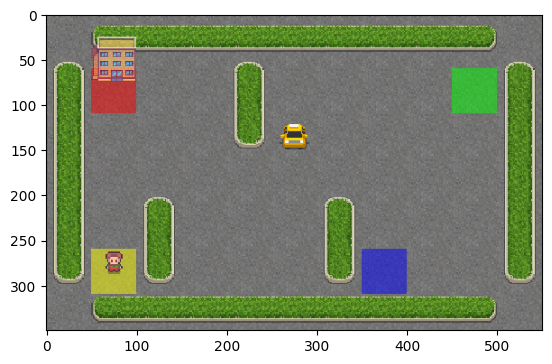

In [34]:
#implementing the rendered environment in matplotlib and initialzing the state of the taxi
env.reset()
env.s = 123
img = env.render()
plt.imshow(img)
plt.show()

In [35]:
# Class for Random Agent
class RandomAgent:

  def __init__(self,env):
    self.env = env

  def get_action(self, state) -> int:
    return self.env.action_space.sample()

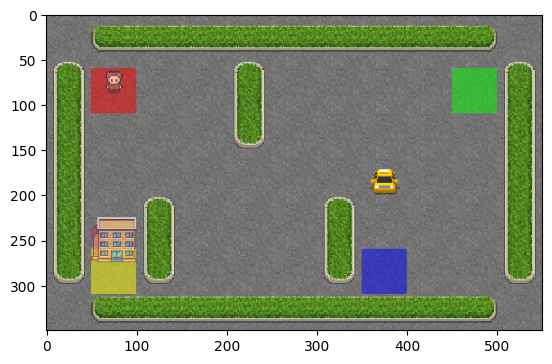

Timesteps taken with RandomAgent:  3665
Penalties incurres with RandomAgent:  1170


In [36]:
#Create Agent using Random Agent Class
#implementing the rendered environment in matplotlib and initialzing the state of the taxi
env.reset()
env.s = 123
img = env.render()
plt.imshow(img)
plt.show()
agent = RandomAgent(env)
env.s = state
epochs = 0
penalties = 0
reward = 0
frames = []
done = False
while not done:
    action = agent.get_action(state)
    step_result = env.step(action)

    #print("Step Result:", step_result)

    state, reward, done, info = step_result[:4]
    if reward == -10:
        penalties = penalties + 1
    frames.append({
        'frame' : env.render(),
        'state' : state,
        'action' : action,
        'reward' : reward
    })
    epochs = epochs + 1
print("Timesteps taken with RandomAgent: ", epochs)
print("Penalties incurres with RandomAgent: ", penalties)

#Now let's compare this with the Q Learning Algorithm

In [37]:
class QAgent:

    def __init__(self, env, learning_rate, discount_factor):
        self.env = env

        #Creating q_table with numpy with the observation space and action space
        self.q_table = np.zeros([env.observation_space.n,env.action_space.n])

        self.learning_rate = learning_rate
        self.gamma = discount_factor

    def get_action(self, state) -> int:

        return np.argmax(self.q_table[state, :])

    def update_parameters(self, state, action, reward, next_state):
        #Implementing the bellman's equation
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)

        #fill the q-table with the values
        self.q_table[state, action] = new_value

In [38]:
#training the model

epsilon = 0.1
learning_rate = 0.3
discount_factor = 0.5
episodes = 15000

agent = QAgent(env, learning_rate, discount_factor)

timesteps_Q_agent = []
penalties_Q_agent = []

for i in range(0, episodes+1):
  state = env.reset()
  state = int(list(state)[0])
  epochs = 0
  penalties = 0
  reward = 0
  done = False

  while not done:

    if random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = agent.get_action(state)
    _step_result = env.step(action)
    next_state, reward, done, info = _step_result[:4]

    next_state = int(next_state)
    agent.update_parameters(state, action, reward, next_state)

    if reward == -10:
      penalties = penalties + 1

    state = next_state
    epochs = epochs + 1

  timesteps_Q_agent.append(epochs)
  penalties_Q_agent.append(penalties)

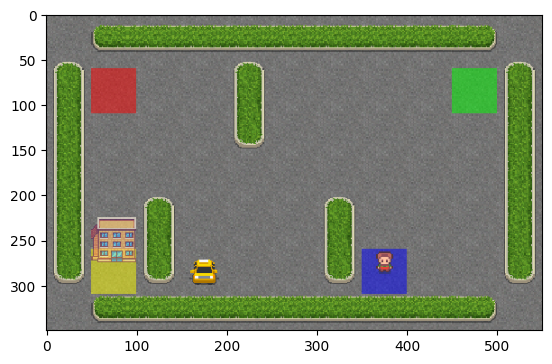

Timesteps taken by agent with Q Learning:  15
Penalties incurred by agent with Q learning:  0


In [39]:
#implementing the agent using q-learning

env.reset()
state = 123
state = int(state)
env.s = state
img = env.render()
plt.imshow(img)
plt.show()

epochs = 0
penalties = 0
reward = 0

frames = []

done = False

while not done:

    action = agent.get_action(state)
    _step_result = env.step(action)
    next_state, reward, done, info = _step_result[:4]

    next_state = int(next_state)
    agent.update_parameters(state, action, reward, next_state)

    if reward == -10:
        penalties = penalties + 1

    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    state = next_state

    epochs = epochs + 1

print("Timesteps taken by agent with Q Learning: ",epochs)
print("Penalties incurred by agent with Q learning: ", penalties)

#References

https://developer.ibm.com/learningpaths/get-started-automated-ai-for-decision-making-api/what-is-automated-ai-for-decision-making/

https://www.gocoder.one/blog/rl-tutorial-with-openai-gym/

https://www.techtarget.com/searchenterpriseai/definition/Q-learning#:~:text=Q%2Dlearning%20is%20a%20machine,way%20animals%20or%20children%20learn.